# IMDB Movies Content Based Filtering (KNN and Cosine similarity)

## DataSet Information:
<p align='center'>
	<img  width='100%' src='
https://user-images.githubusercontent.com/57904007/170904420-aa173c83-573b-434b-a316-525faa908e35.png' alt='Sumber: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows'>
</p>

| Jenis | Keterangan |
| - | - |
| Sumber | [Kaggle Dataset : IMDB Movies Dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/metadata) |
| Jenis dan Ukuran Berkas | CSV (438.1 kB) |
| Rating Penggunaan | 10.0 (Silver) |
| Lisensi | CC0: Public Domain |

Penjelasan mengenai variabel-variable pada data diabetes dapat dilihat pada poin-poin berikut:

- `Poster_Link`: Link poster film.
- `Series_Title`: Nama film.
- `Released_Year`: Tahun rilis film.
- `Certificate`: Sertifikat yang diperoleh dari film tersebut.
- `Runtime`: Durasi film.
- `Genre`: Genre film.
- `IMDB_Rating`: Peringkat film pada situs IMDB.
- `Overview`: Sinopsis / ringkasan dari film tersbut.
- `Meta_score`: Skor yang diperoleh dari film tersbut.
- `Director`: Director dari film.
- `Star1,Star2,Star3,Star4`: Pemeran bintang  pada film tersebut.
- `No_of_Votes`: Jumlah total vote dari film tersebut.
- `Gross`: Penghasilan yang diperoleh film tersebut.

## Import Dataset

In [31]:
import os
os.environ['KAGGLE_USERNAME'] = 'lanaahm'
os.environ['KAGGLE_KEY'] = 'c5dac849baf021db5db739062fdf3105'

In [32]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

imdb-dataset-of-top-1000-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!unzip /content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip

Archive:  /content/imdb-dataset-of-top-1000-movies-and-tv-shows.zip
replace imdb_top_1000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imdb_top_1000.csv       


## Import Library

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
%matplotlib inline

## Data Understanding

### Convert Dataset into pandas

In [152]:
df = pd.read_csv('/content/imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Dataset Variable Description

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Check Missing Value

In [154]:
df.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Check the Description of Dataset Statistics

In [155]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## Data Preparation

### Pembersihan data pada setiap kolom


#### Kolom Rating

Pada dataset ini rating terdapat pada 2 kolom yaitu IMDB_Rating dan Meta_score. Berdasarkan informasi IMDB data pada kolom IMDB_Rating adalah sebuah rating dari film berdasarkan rata" dari hasil voting, sedangkan pada kolom Meta_score adalah skor diberikan untuk ulasan film dari sekelompok besar kritikus paling dihormati di dunia.

##### Kolom IMDB_Rating

In [156]:
print('Jumlah data kosong pada kolom IMDB_Rating: ',df.IMDB_Rating.isnull().sum())
print('Jumlah data pada kolom IMDB_Rating: ', len(df.IMDB_Rating))
print('Data unik pada kolom IMDB_Rating:\n', df.IMDB_Rating.unique().tolist())


Jumlah data kosong pada kolom IMDB_Rating:  0
Jumlah data pada kolom IMDB_Rating:  1000
Data unik pada kolom IMDB_Rating:
 [9.3, 9.2, 9.0, 8.9, 8.8, 8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8.0, 7.9, 7.8, 7.7, 7.6]


##### Kolom Meta_score

In [157]:
print('Jumlah data kosong pada kolom Meta_score: ',df.Meta_score.isnull().sum())
print('Jumlah data pada kolom Meta_score: ', len(df.Meta_score))
print('Data unik pada kolom Meta_score:\n', df.Meta_score.unique())

Jumlah data kosong pada kolom Meta_score:  157
Jumlah data pada kolom Meta_score:  1000
Data unik pada kolom Meta_score:
 [ 80. 100.  84.  90.  96.  94.  74.  66.  92.  82.  87.  73.  83.  nan
  79.  91.  61.  59.  65.  85.  98.  89.  88.  57.  67.  62.  77.  64.
  75.  97.  99.  78.  68.  81.  95.  76.  69.  55.  70.  58.  86.  71.
  63.  93.  72.  60.  47.  49.  50.  33.  54.  56.  51.  53.  48.  44.
  45.  40.  52.  28.  36.  46.  30.  41.]


Data Meta_score terdapat nilai yang hilang atau kosong berbeda dengan IMDB_Rating yang memiliki data yang rapih. Pada data ini akan dilakukan pengisian data dengan menggunakan KNNImputer untuk mengatasi data yang hilang dengan cara ini, distribusi data Meta_score akan tetap terjaga pada dikarenakan metode ini akan melakukan pengisian sesuai dengan nilai terdekat.

In [158]:
# Inisialisasi KNNImputer dengan parameter n_neighbors = 50 untuk melakukan pengisian berdasarkan 50 tetangga terdekat
imputer = KNNImputer(n_neighbors=50)
# Melakukan imputasi pada nilai NaN
df['Meta_score'] = imputer.fit_transform(df[['Meta_score']]).ravel()
# Melakukan pembulatan data pada hasil KNNImputer
df['Meta_score'] = df['Meta_score'].round(decimals=1)


print('Cek jumlah data kosong setelah dilakukan pengisian pada kolom Meta_score: ',df.Meta_score.isnull().sum())

Cek jumlah data kosong setelah dilakukan pengisian pada kolom Meta_score:  0


#### Kolom Runtime

In [159]:
print('Jumlah data kosong pada kolom Runtime: ',df.Runtime.isnull().sum())
print('Jumlah data pada kolom Runtime: ', len(df.Runtime))
print('Data unik pada kolom Runtime:\n', df.Runtime.unique())

Jumlah data kosong pada kolom Runtime:  0
Jumlah data pada kolom Runtime:  1000
Data unik pada kolom Runtime:
 ['142 min' '175 min' '152 min' '202 min' '96 min' '201 min' '154 min'
 '195 min' '148 min' '139 min' '178 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 min' '125 min' '189 min' '116 min' '127 min' '118 min' '121 min'
 '207 min' '122 min' '106 min' '112 min' '151 min' '150 min' '155 min'
 '119 min' '110 min' '88 min' '137 min' '89 min' '165 min' '109 min'
 '102 min' '87 min' '126 min' '147 min' '117 min' '181 min' '149 min'
 '105 min' '164 min' '170 min' '98 min' '101 min' '113 min' '134 min'
 '229 min' '115 min' '143 min' '95 min' '104 min' '123 min' '131 min'
 '108 min' '81 min' '99 min' '114 min' '129 min' '228 min' '128 min'
 '103 min' '107 min' '68 min' '138 min' '156 min' '167 min' '163 min'
 '186 min' '321 min' '135 min' '140 min' '180 min' '158 min' '210 min'
 '86 min' '162 min' '177 min' '204 min' '91 mi

pada kolom runtime tidak terdapat nilai yang kosong melainkan data tersebut masih dalam bentuk object string sehingga perlu dilakukan konversi data. disini yang dilakukan adalah menghapus nilai min dikarenakan data tersebut dalam bentuk menit.

In [160]:
# Mengganti nilai pada kolom runtime
df['Runtime']= df['Runtime'].str.replace('min','')
# Mengganti tipe data kolom runtime
df['Runtime'] = df['Runtime'].astype('float')

In [161]:
df['Runtime']

0      142.0
1      175.0
2      152.0
3      202.0
4       96.0
       ...  
995    115.0
996    201.0
997    118.0
998     97.0
999     86.0
Name: Runtime, Length: 1000, dtype: float64

#### Kolom Released_Year

In [162]:
print('Jumlah data kosong pada kolom Certificate: ',df.Released_Year.isnull().sum())
print('Jumlah data pada kolom Certificate: ', len(df.Released_Year))
print('Data unik pada kolom Certificate:\n', df.Released_Year.unique())

Jumlah data kosong pada kolom Certificate:  0
Jumlah data pada kolom Certificate:  1000
Data unik pada kolom Certificate:
 ['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


dapat dilihat pada data tahun rilis terdapat data dengan tahun rilis PG dan dilakukan analisis lebih lanjut pada dapat tersebut.

In [163]:
df.loc[df.Released_Year == 'PG']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140.0,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


Terdapat 1 data dengan tahun rilis PG pada dapat tersebut dilakukan pengapusan dikarenakan data tersebut hanya 1 sehingga tidak terlalu berpengaruh.

In [164]:
# Menghapus data Released_Year == PG
df.drop(df.loc[df.Released_Year == 'PG'].index, inplace=True)

# Melakukan konversi data dengan tipe data int
df['Released_Year'] = df['Released_Year'].astype('int')

#### Kolom Certificate

In [165]:
print('Jumlah data kosong pada kolom Certificate: ',df.Certificate.isnull().sum())
print('Jumlah data pada kolom Certificate: ', len(df.Certificate))
print('Data unik pada kolom Certificate:\n', df.Certificate.unique())

Jumlah data kosong pada kolom Certificate:  101
Jumlah data pada kolom Certificate:  999
Data unik pada kolom Certificate:
 ['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']


Dapat dilihat pada kolom Certificate memiliki data yang kosong dengan jumlah 101 data, dan pada data unik terdapat data unrated yang berarti data terdapat beberapa film yang tidak memiliki Certificate sehingga pada data yang kosong bisa kita isi dengan unrated.

In [166]:
df['Certificate'].fillna('Unrated', inplace = True)

### Pembersihan data duplikasi

In [167]:
print('Cek jumlah data duplikat pada dataset: ', df.duplicated().sum())
print('\n\n')
df.info()

Cek jumlah data duplikat pada dataset:  0



<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    int64  
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 132

Dapat dilihat informasi data setelah dilakukan pengisian data pada beberapa komlom yang memiliki data kosong. pada kolom gross data tersebut tidak dilakukan pengisian dikarenakan data tersebut adalah data produksi dari film tersebut sehingga tidak terlalu berpengauh dan dapat dilakukan penghapusan.

### Univariate Analysis

In [168]:
numerical_features = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
categorical_features = ['Certificate']

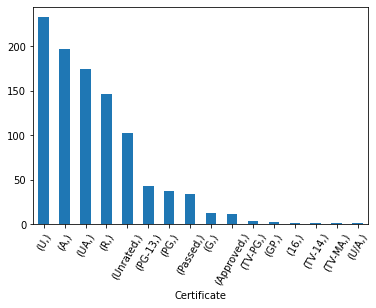

In [169]:
df[categorical_features].value_counts().plot(kind='bar', rot=60)

Pada tampilanvisualisasi data diatas dapat dilihat bawah distribusi kategori pada kolom Certificate memiliki distribusi data dengan kategori U berada pada rentang nilai 200, kategori A diretang 150-190, kategori UA berada pada rentang 150-180, dan seterusnya.

[None, None, None, None]

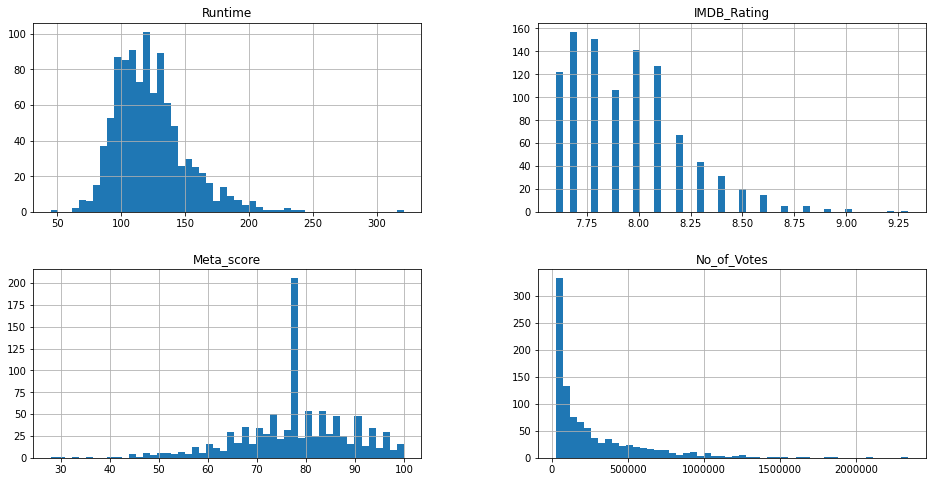

In [170]:
fig = df[numerical_features].hist(bins=50, figsize=(16,8))
[x.ticklabel_format(useOffset=False, style='plain') for x in fig.ravel()]

Dapat dilihat pada tampilan visualisasi beberapa kolom data diatas memiliki distribusi data yang bervariasi yang akan dijelaskan sebagai berikut:

- Kolom Runtime, data tersebut merupakan data durasi yang dimiliki setiap film dalam menit dapat dilihat sebaran data runtime film yang memiliki durasi 100 menit berada pada rentang 80, film yang memiliki durasi 150 berapa pada rentang 20-30, dan seterusnya.
- Kolom IMDB_Rating, data tersebut merupakan data rating dari film berdasarkan rata" dari hasil voting pada situs IMDB dapat dilihat sebaran data IMDB_Rating film yang memiliki rating 7.5 menit berada pada rentang 140-160, film yang memiliki rating 8.0 berapa pada rentang 140, dan seterusnya.
- Kolom Meta_Score, data tersebut merupakan data skor yang diberikan untuk ulasan film dari sekelompok besar kritikus paling dihormati di dunia dapat dilihat sebaran data Meta_Score film yang memiliki Meta_Score 60 menit berada pada rentang 20-25, film yang memiliki Meta_Score 70 berapa pada rentang 30-40, dan seterusnya.
- Kolom No_of_votes, data tersebut merupakan data jumlah total vote dari film tersebut dapat dilihat sebaran data No_of_votes pada film yang memiliki vote kurang dari 5 juta vote berada pada rentang 100-360, film yang memiliki vote 5 juta berapa pada rentang 30-5, dan seterusnya.

### Multivariate Analysis

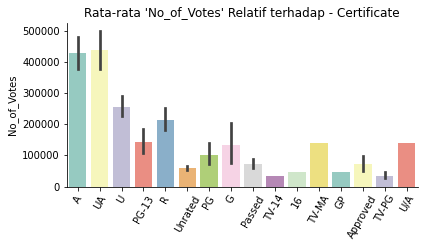

In [171]:
for index, col in enumerate(categorical_features):
  sns.catplot(x=col, y='No_of_Votes', kind='bar', dodge=False, height=3, aspect=6/3, data=df, palette='Set3').set(xlabel=None)
  plt.title("Rata-rata 'No_of_Votes' Relatif terhadap - {}".format(col))
  plt.xticks(rotation=60)
plt.show() 

Dapat dilihat pada tampilan visualisasi fitur Certificate data diatas memiliki hubungan terhadap hasil jumlah votes film. hasil visualisasi tersebut menunjukan data certificate dengan beberapa kategori yang memiliki hubungan terhadap jumlah. Film yang Certificate A memiliki hubungan dengan hasil jumlah vote yang berada pada kisaran angka 4juta, Film yang Certificate U memiliki hubungan dengan hasil jumlah vote yang berada pada kisaran angka 2juta. dan seterusnya

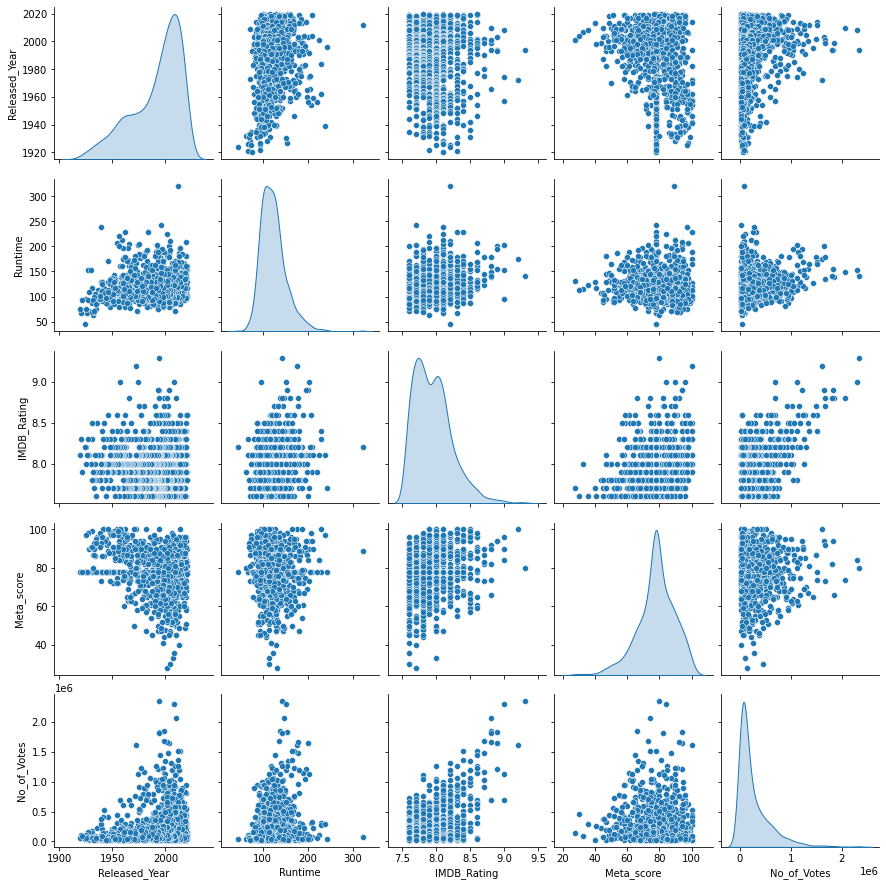

In [172]:
sns.pairplot(df, diag_kind = 'kde')

Tampilan visualisasi diatas menunjukkan relasi pasangan dalam dataset. Pada kasus ini hanya fokus terhadap No_of_Votes dari pola sebaran data (titik-titik) pada tampilan di atas, pola data grafik No_of_Votes memiliki korelasi positif. Hal ini ditandai dengan meningkatnya variabel pada sumbu y saat terjadi peningkatan variabel pada sumbu x yang terdapat pada tampilan IMDB_Rating dan Meta_score.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

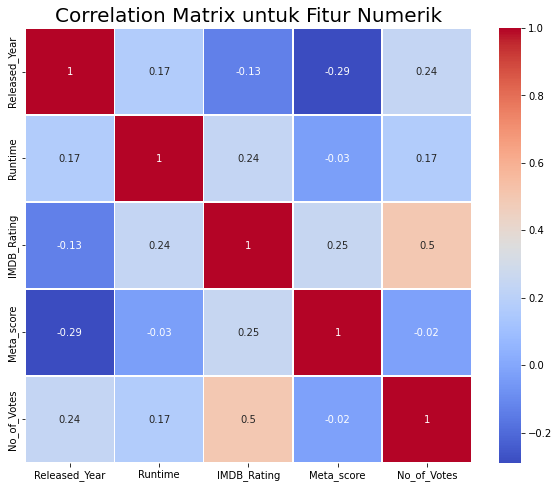

In [173]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size=20)

Dapat dilihat pada tampilan visualisasi korelasi fitur data diatas. Korelasi mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah. Tampilan diatas menunjukan bahwa kolom data Meta_Score memiliki hubungan yang lemah terhadap hasil voteing sehingga dapat dilakukan pengapusan pada kolom data tersebut.

### Penghapusan data yang tidak digunakan

In [174]:
# Menyimpan nama film pada dataframe baru
df_series_title = pd.DataFrame({'Series_Title': df['Series_Title'], 'Genre': df['Genre']})



# Mengubah kolom Series_Title sebagai index
df.set_index('Series_Title',inplace=True)

# Menghapus Kolom yang tidak digunakan
df.drop(['Poster_Link', 'Overview', 'Gross', 'Meta_score'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, The Shawshank Redemption to The 39 Steps
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  999 non-null    int64  
 1   Certificate    999 non-null    object 
 2   Runtime        999 non-null    float64
 3   Genre          999 non-null    object 
 4   IMDB_Rating    999 non-null    float64
 5   Director       999 non-null    object 
 6   Star1          999 non-null    object 
 7   Star2          999 non-null    object 
 8   Star3          999 non-null    object 
 9   Star4          999 non-null    object 
 10  No_of_Votes    999 non-null    int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 93.7+ KB


Dapat dilihat kolom menjadi 10 dari 15 kolom gross, Poster_Link, Overview, Meta_score telah dihapus dikarenakan kolom tersebut tidak gunakan. Penghapusan kolom Overview adalah untuk menghindari kemiripan rekomendasi dan rekomendasi menjadi lebih general. pada kolom Meta_score dihapus karenakan memiliki korelasi lemah yang sudah dijelaskan sebelumnya. sedangkan untuk Poster_link dan gross memang tidak digunakan dalam kasus ini.

### Konversi label kategori menjadi one-hot encoding

#### Kolom Genre

In [175]:
# Mengambil setiap unik pada kolom Genre
genres = np.unique(', '.join(df['Genre']).split(', '))
df_one_hot_genre = pd.DataFrame()
# Proses one-hot encoding pada kolom genre
for genre in genres:
    df_one_hot_genre['genre_'+ genre] = df['Genre'].str.contains(genre).astype('int')

# Menghapus kolom Genre pada dataset 
df.drop('Genre', axis = 1, inplace = True)

#### Kolom Certificate

In [176]:
# Proses one-hot encoding pada kolom Certificate
df_one_hot_certificate = pd.get_dummies(df['Certificate'], prefix='Certificate')

# Menghapus kolom Certificate pada dataset 
df.drop('Certificate', axis = 1, inplace = True)

#### Kolom Director

In [177]:
# Proses one-hot encoding pada kolom Director
df_one_hot_director = pd.get_dummies(df['Director'], prefix='Director')

# Menghapus kolom Director pada dataset 
df.drop('Director', axis = 1, inplace = True)

#### Kolom Star1, Star2, Star3, dan Star4

In [178]:
# Proses one-hot encoding pada kolom ['Star1', 'Star2', 'Star3', 'Star4']
column_stars = df[['Star1', 'Star2', 'Star3', 'Star4']].keys()
df_one_hot_stars = pd.get_dummies(df[column_stars])

# Menghapus kolom ['Star1', 'Star2', 'Star3', 'Star4'] pada dataset 
df.drop(['Star1', 'Star2', 'Star3', 'Star4'], axis = 1, inplace = True)

### Mengabungkan proses one hot encoding dengan dataset

In [179]:
# Mengabungkan proses one hot encoding dengan dataset
df = pd.concat([df, df_one_hot_certificate, df_one_hot_genre, df_one_hot_director, df_one_hot_stars],axis=1)
df.head()

,Released_Year,Runtime,IMDB_Rating,No_of_Votes,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,...,Star4_Yûnosuke Itô,Star4_Zac Mattoon O'Brien,Star4_Zach Grenier,Star4_Zarah Jane McKenzie,Star4_Zeppo Marx,Star4_Ziyi Zhang,Star4_Zoe Saldana,Star4_Zoë Kravitz,Star4_Álvaro Guerrero,Star4_Émile Vallée
Series_Title,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,1994,142.0,9.3,2343110,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Godfather,1972,175.0,9.2,1620367,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Dark Knight,2008,152.0,9.0,2303232,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The Godfather: Part II,1974,202.0,9.0,1129952,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12 Angry Men,1957,96.0,9.0,689845,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalisasi data Numerik

In [180]:
scaler = MinMaxScaler()

column_numeric = ['Released_Year', 'Runtime', 'IMDB_Rating', 'No_of_Votes']
scaler.fit(df[column_numeric])
df[column_numeric] = scaler.transform(df.loc[:, column_numeric])

df[column_numeric].describe().round(4)

,Released_Year,Runtime,IMDB_Rating,No_of_Votes
count,999.0000,999.0000,999.0000,999.0000
mean,0.7122,0.2822,0.2057,0.1073
std,0.2330,0.1018,0.1620,0.1413
min,0.0000,0.0000,0.0000,0.0000
25%,0.5600,0.2101,0.0588,0.0131
50%,0.7900,0.2681,0.1765,0.0489
75%,0.8900,0.3333,0.2941,0.1507
max,1.0000,1.0000,1.0000,1.0000


## Model Development Content Based Filtering

#### K-Nearest Neighbor

In [181]:
# Membuat sistem rekomendasi dengan model K-Nearest Neighbor
# Inisiasi model 
model = NearestNeighbors(metric='euclidean')

# Melakukan fitting model terhadap data
model.fit(df)

NearestNeighbors(metric='euclidean')

In [230]:
# Recommender KNN
def getRecommenderMovies_KNN(movies:str, recommend_movies:int=10):
  print(f'Apabila pengguna menyukai film {movies}\n{recommend_movies} film berikut dapat direkomendasikan pada pengguna :')

  # Mencari film terdekat dengan film yang disukai
  distances, neighbors = model.kneighbors(df.loc[df.index == movies], n_neighbors=recommend_movies)

  # Memasukkan film yang sama pada list similar_movies
  similar_movies, genre = [], []
  for movei_title in df_series_title.loc[neighbors[0][:]].values:
    similar_movies.append(movei_title[0])
    genre.append(movei_title[1])

  # Memasukan nilai kemiripan pada sebuah list
  similar_distance = []
  for distance in distances[0]:
    similar_distance.append(f"{round(100-distance, 2)}%")
    
  # Menampilkan remokendasi pada pengguna
  return pd.DataFrame(data = {"Nama Film" : similar_movies, "Genre" : genre, "Tingkat Kesamaan" : similar_distance})

In [232]:
getRecommenderMovies_KNN(df_series_title.loc[10][0])

Apabila pengguna menyukai film The Lord of the Rings: The Fellowship of the Ring
10 film berikut dapat direkomendasikan pada pengguna :


,Nama Film,Genre,Tingkat Kesamaan
0,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",100.0%
1,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",97.55%
2,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",97.55%
3,Shichinin no samurai,"Action, Adventure, Drama",96.75%
4,Indiana Jones and the Last Crusade,"Action, Adventure",96.63%
5,The Hobbit: An Unexpected Journey,"Adventure, Fantasy",96.61%
6,Stand by Me,"Adventure, Drama",96.59%
7,The Ten Commandments,"Adventure, Drama",96.54%
8,Gladiator,"Action, Adventure, Drama",96.53%
9,Avengers: Endgame,"Action, Adventure, Drama",96.5%


### Cosine Similarity

In [233]:
# Menghitung cosine similarity dari dataframe
cosine_sim = cosine_similarity(df)

# Menyimpan hasil perhitungan pada dataframe
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_series_title['Series_Title'], columns=df_series_title['Series_Title'])
# cosine_sim_df.head()

In [244]:
# Recommender Cosine Similarity
def getRecommenderMovies_cosine(movies:str, recommend_movies:int=10):
  print(f'Apabila pengguna menyukai film {movies[0]}\n{recommend_movies} film berikut dapat direkomendasikan pada pengguna :')

  # Mencari nilai unik pada aplikasi yang disukai pengguna di baris dataframe cosine sim
  # Nilai unik (arr) dikembalikan dalam bentuk yang berurutan dari kecil ke besar 
  arr, ind = np.unique(cosine_sim_df.loc[movies[0]], return_index=True)

  # Memasukkan film yang sama pada list similar_movies
  similar_movies, genre = [], []
  for index in ind[-(recommend_movies+1):-1]:
    similar_movies.append(df_series_title.loc[index][0])
    genre.append(df_series_title.loc[index][1])

  # Memasukkan skor cosine dari aplikasi yang serupa mulai dari index kedua terakhir sampai index n terakhir
  cosine_score = []
  for score in arr[-(recommend_movies+1):-1]:
    cosine_score.append(score)
  
  # Menampilkan remokendasi pada pengguna
  return pd.DataFrame(data = {"Nama Film" : similar_movies, "Genre" : genre, 'Tingkat Kesamaan' : cosine_score}).sort_values(by='Tingkat Kesamaan',ascending=False)

In [245]:
getRecommenderMovies_cosine(df_series_title.loc[10])

Apabila pengguna menyukai film The Lord of the Rings: The Fellowship of the Ring
10 film berikut dapat direkomendasikan pada pengguna :


,Nama Film,Genre,Tingkat Kesamaan
9,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",0.726373
8,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",0.721922
7,Shichinin no samurai,"Action, Adventure, Drama",0.489566
6,Gladiator,"Action, Adventure, Drama",0.433686
5,Avengers: Endgame,"Action, Adventure, Drama",0.430060
4,The Hobbit: An Unexpected Journey,"Adventure, Fantasy",0.427361
3,Indiana Jones and the Last Crusade,"Action, Adventure",0.425161
2,The Lion King,"Animation, Adventure, Drama",0.414601
1,Spider-Man: Into the Spider-Verse,"Animation, Action, Adventure",0.412155
0,Pirates of the Caribbean: The Curse of the Bla...,"Action, Adventure, Fantasy",0.412119


## Evaluasi

### Precission

Presisi adalah kemampuan pengklasifikasi untuk tidak melabeli instance positif yang sebenarnya negatif. Untuk setiap kelas itu didefinisikan sebagai rasio positif benar dengan jumlah positif benar dan salah. berikut merupakan formula dari precission.
  ```
  TP – True Positives
  FP – False Positives

  Precision = TP/(TP + FP)
  ```

#### KNN
Precision pada hasil pendekatan KNN didapatkan nilai 90%. dikarenakan hasil prediksi yang memiliki genre serupa berjumlah 9 dan 1 rekomendasi memiliki genre Fantasy

#### Cosine Similarity
Precision pada hasil pendekatan Cosine Similarity didapatkan nilai 70%. dikarenakan hasil prediksi yang memiliki genre serupa berjumlah 7 dan 3 rekomendasi memiliki genre Fantasy dan Animation

### Davies Bouldin

In [252]:
davies_bouldin_score(df, df_series_title['Series_Title'])

0.548381867316622

Davies Bouldin adalah skema evaluasi internal, di mana validasi seberapa baik pengelompokan telah dilakukan dilakukan dengan menggunakan jumlah dan fitur yang melekat pada dataset. Davies-Bouldin mengukur rasio antara jarak dalam cluster dan antara jarak cluster dan menghitung rata-rata keseluruhan cluster. Oleh karena itu relatif sederhana, dibatasi – 0 hingga 1, skor yang lebih rendah lebih baik.

### Calinski Harabasz

In [253]:
calinski_harabasz_score(df, df_series_title['Series_Title'])

1.1025731456249224

Calinski-Harabasz membandingkan varians antar-cluster dengan varians dalam setiap cluster. Semakin tinggi skor semakin baik pemisahannya.